### ML program to understand K-Fold Validation on IRIS dataset

In order to train our Machine Learning model and then test it to know that it works fine, we divide the dataset in train and test. Usually the ratio is either  70:30 or 80:20 or 90:10. The method is popularly referred as 'train/test split'. 

There is one problem is above method - The data used for training will be the only data on which model will be trained on. That means, we are not using our data part of 'testing data' in training our model. Considering the the fact that more the data provides best results for model training, this method does not seem optimal. Also training on limited set of data could cause a problem referred as 'over-fitting'.


So to avoid over-fitting, we will use a better approach - "K-Fold Validation technique"
This technique makes sures that every sample is used for training and testing. Thus we get the most accurate model

In [3]:
from sklearn.datasets import load_iris
import pandas as pd

In [4]:
iris = load_iris()

In [13]:
# checking whether we have correct data loaded in our variable 'iris'
print(iris.data[:3])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


In [18]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [21]:
# Printing the names of iris flower types
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
iris.data.shape

(150, 4)

In [24]:
iris.target.shape

(150,)

In [27]:
import matplotlib.pyplot as plt

Before we begin, let us visualize our data

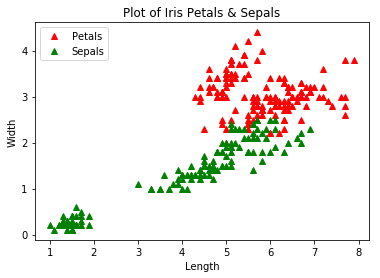

In [52]:
# Segregating the data column-wise

petal_len = iris.data[:,0]
petal_width = iris.data[:,1]
sepal_len = iris.data[:,2]
sepal_width = iris.data[:,3]

# Plotting it just to get an idea

%matplotlib inline
petals, = plt.plot(petal_len, petal_width,'r^', label='Petals')
sepals, = plt.plot(sepal_len, sepal_width,'g^', label='Sepals')
plt.title('Plot of Iris Petals & Sepals')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend(handles=[petals,sepals])

Let us divide our dataset into test and training sets using k-fold validation technique module under sklearn library.

In [55]:
# Importing the library for K-Fold

from sklearn.model_selection import KFold

In [70]:
kf = KFold(n_splits=3, shuffle=True)

In [71]:
type(kf)

sklearn.model_selection._split.KFold

In [72]:
print(kf)

KFold(n_splits=3, random_state=None, shuffle=True)


In [73]:
X = iris.data
y = iris.target
kf.get_n_splits(X, y)

3

In [74]:
print(kf)

KFold(n_splits=3, random_state=None, shuffle=True)


In [75]:
kf.split(y)

<generator object _BaseKFold.split at 0x0000028E2AB88468>

In [76]:
for train_index, test_index in kf.split(y):
    print('train', train_index, '\n\ntest', test_index, '\n\n ######### \n\n')
    y_train, y_test = y[train_index], y[test_index]

train [  2   3   4   5   7   8   9  10  11  12  13  14  15  17  18  20  21  22
  23  26  27  31  32  33  35  36  39  40  41  42  43  44  45  46  47  49
  52  54  55  57  58  59  60  61  62  63  64  65  66  68  69  70  71  72
  74  76  81  82  83  84  86  88  89  90  91  93  96  97  99 100 102 105
 106 108 109 111 112 113 117 118 120 121 124 125 126 127 128 129 132 133
 135 136 137 138 139 140 142 145 146 147] 

test [  0   1   6  16  19  24  25  28  29  30  34  37  38  48  50  51  53  56
  67  73  75  77  78  79  80  85  87  92  94  95  98 101 103 104 107 110
 114 115 116 119 122 123 130 131 134 141 143 144 148 149] 

 ######### 


train [  0   1   2   4   6   7  11  13  15  16  19  20  21  23  24  25  28  29
  30  31  32  33  34  35  37  38  39  40  41  42  43  46  47  48  49  50
  51  53  56  58  59  62  63  64  67  69  73  74  75  76  77  78  79  80
  81  84  85  86  87  88  91  92  94  95  96  98 100 101 103 104 105 107
 109 110 112 113 114 115 116 118 119 121 122 123 126 129 130 1